In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
root_path = 'C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset'
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [3]:
root_path = 'C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset'
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [4]:
name_class = os.listdir('C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset')
name_class

['Arborio',
 'Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Rice_Citation_Request.txt']

In [5]:
file_path='C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset'


In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))


In [7]:
print(filepaths[0:2])


['C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset\\Arborio\\Arborio (1).jpg', 'C:\\Users\\mayur\\OneDrive\\Desktop\\Rice_Image_Dataset\\Arborio\\Arborio (10).jpg']


In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Arborio',
 'Ar

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,C:\Users\mayur\OneDrive\Desktop\Rice_Image_Dat...,Basmati
1,C:\Users\mayur\OneDrive\Desktop\Rice_Image_Dat...,Karacadag
2,C:\Users\mayur\OneDrive\Desktop\Rice_Image_Dat...,Arborio
3,C:\Users\mayur\OneDrive\Desktop\Rice_Image_Dat...,Basmati
4,C:\Users\mayur\OneDrive\Desktop\Rice_Image_Dat...,Arborio


C:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


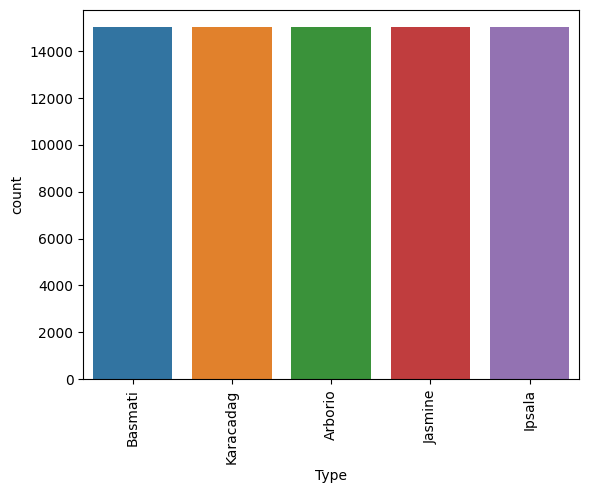

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)


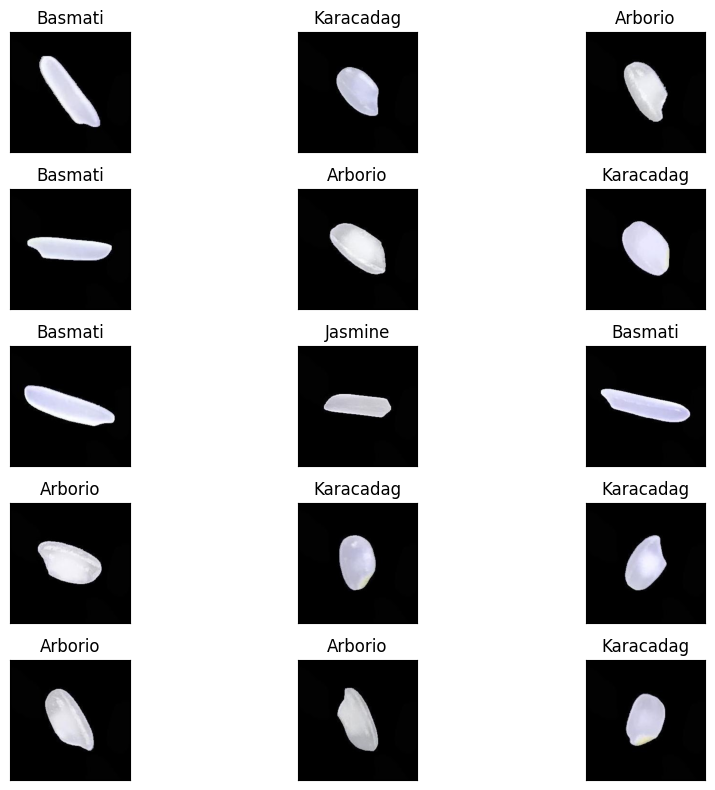

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 56250 validated image filenames belonging to 5 classes.
Found 18750 validated image filenames belonging to 5 classes.
Found 18750 validated image filenames belonging to 5 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

Epoch 1/3
1758/1758 [==============================] - 1744s 988ms/step - loss: 0.0830 - accuracy: 0.9716 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 2/3
1758/1758 [==============================] - 2031s 1s/step - loss: 0.0448 - accuracy: 0.9849 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 3/3
1758/1758 [==============================] - 2071s 1s/step - loss: 0.0360 - accuracy: 0.9874 - val_loss: 0.0361 - val_accuracy: 0.9877


In [20]:
model.save("model_resnet50_augmented.h5")  

C:\Users\mayur\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


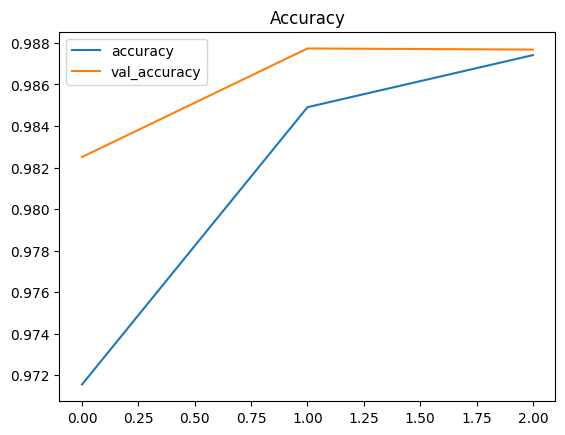

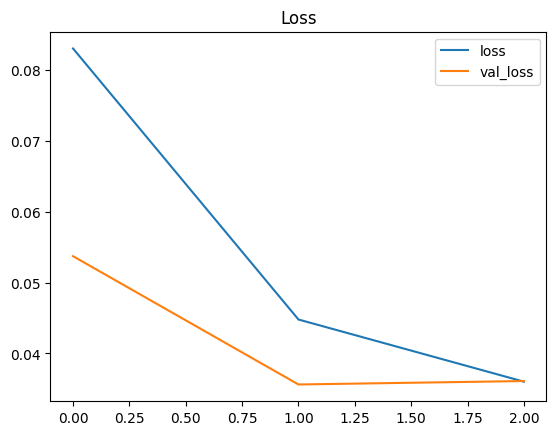

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.03611
Test Accuracy: 98.77%


In [23]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

586/586 [==============================] - 519s 883ms/step


In [24]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Arborio       0.99      0.98      0.99      3635
     Basmati       1.00      0.97      0.98      3807
      Ipsala       1.00      1.00      1.00      3765
     Jasmine       0.97      0.99      0.98      3876
   Karacadag       0.98      1.00      0.99      3667

    accuracy                           0.99     18750
   macro avg       0.99      0.99      0.99     18750
weighted avg       0.99      0.99      0.99     18750



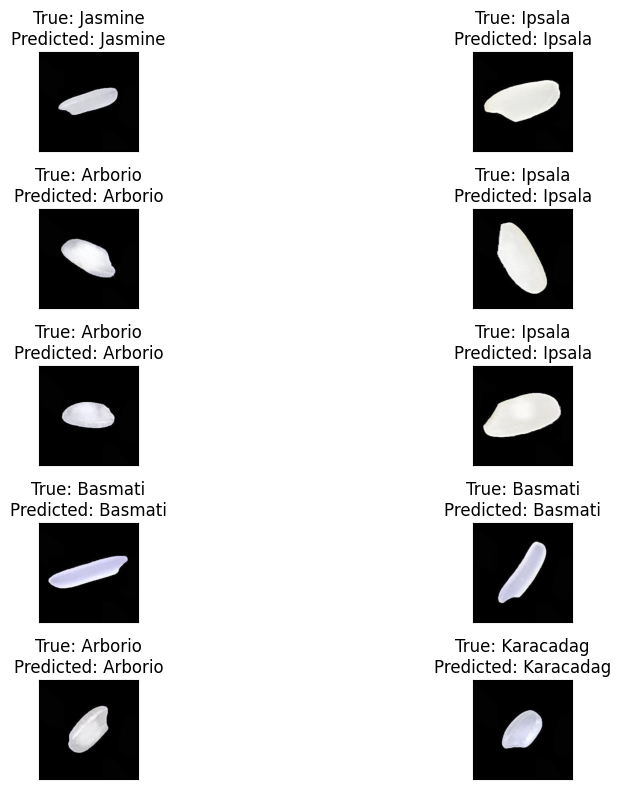

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()